<a href="https://colab.research.google.com/github/raymondzhao1/csm-61a/blob/main/Extra_Problems_Master_Key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2/10: Higher-Order Environments, Currying, and Recursion**

## Q1: No Zeros
Write a function that removes all 0's from an integer.

In [ ]:
def no_zeros(n):
    """ 
    If n is a valid positive integer, no_zeros(n) returns n with all 0's removed.
    
    >>> no_zeros(0)
    0 
    >>> no_zeros(12093)
    1293 
    """
    if n == 0:
        return 0
    last, rest = n % 10, n // 10
    if last == 0:
        return no_zeros(rest)
    if last != 0:
        return 10 * no_zeros(rest) + last

Q1 Tests:

In [ ]:
t = no_zeros(0)
assert t == 0, f'Expected 0, but got {t}.'

t = no_zeros(10)
assert t == 1, f'Expected 1, but got {t}.'

t = no_zeros(123)
assert t == 123, f'Expected 123, but got {t}.'

t = no_zeros(10000001)
assert t == 11, f'Expected 10000001, but got {t}.'

t = no_zeros(2002340)
assert t == 2234, f'Expected 2234, but got {t}.'

## **Q2: Every Three**
Write a function that removes every third digit from an integer when reading right to left.

In [ ]:
def remove_every_third(n):
    """ 
    If n is a valid positive integer, remove_every_third(n) returns n with every third digit removed.
    
    >>> remove_every_third(100)
    0 
    >>> no_zeros(12093)
    293 
    """
    def helper(n, i):
        if n == 0:
            return n
        last, rest = n % 10, n // 10
        if i == 0:
            return helper(rest, 2)
        if i != 0:
            return 10 * helper(rest, i - 1) + last
        
    return helper(n, 2)

Q2 Tests:

In [ ]:
t = remove_every_third(100100100100)
assert t == 0, f'Expected 0, but got{t}.'

t = remove_every_third(120100100100)
assert t == 20000000, f'Expected 20000000, but got{t}.'

t = remove_every_third(123342)
assert t == 2342, f'Expected 2342, but got{t}.'

t = remove_every_third(10)
assert t == 10, f'Expected 10, but got{t}.'

t = remove_every_third(0)
assert t == 0, f'Expected 0, but got{t}.'

## **Q3: Every N**
Write a function that returns a function that can remove every nth digit from a number when reading right to left.

In [ ]:
def remove_every_i(i):
    """ 
    If n is a valid positive integer, remove_every_i(n, i) returns n with every ith digit removed.
    
    >>> every_ith_remover = remove_every_i(2)
    >>> every_ith_remover
    <Function>
    >>> every_ith_remover(120343)
    233
    """
    def f(n):
        def helper(n, i, j):
            if n == 0:
                return n
            last, rest = n % 10, n // 10
            if j == 0:
                return helper(rest, i, i)
            if i != 0:
                return 10 * helper(rest, i, j - 1) + last
        return helper(n, i - 1, i - 1)
    return f

Q3 Tests:

In [ ]:
every_second_remover = remove_every_i(2)
t = every_second_remover(120343)
assert t == 233, f'Expected 233, but got {t}.'

every_fifth_remover = remove_every_i(5)
t = every_fifth_remover(123)
assert t == 123, f'Expected 123, but got {t}.'

t = every_fifth_remover(12334012309439)
assert t == 123301239439, f'Expected 123301239439, but got {t}.'

In [ ]:
s = [[False, True,  False, False, False],
     [False, False, True,  False, False],
     [False,  False, False, False, False],
     [False, False, False, False, False],
     [False, False, False, False, False]]

def cycles(s):
  def helper(i, j, target):
    if i == j or j == len(s):
      return False
    elif s[i][target]:
      return True
    elif s[i][j]:
      return helper(j, 0, target)
    else:
      return helper(i, j + 1, target)

  return any([helper(i, 0, i)] for i in range(len(s)))


In [ ]:
cycles(s)

True

# 2/17: Tree Recursion


## **Q1: Tiles**

In [ ]:
def tiles(s, x, y):
  """
  You are given a grid of tiles 's'. Shaded tiles are represented by 1's, 
  and blank tiles are represented by 0's. When tiles(s, x, y) is called on an
  coordinate (x, y), two things happen:
  1) The grid is mutated, with the tile at the coordinate being shaded.
  2) The total number of shaded tiles connected to the tile at the coordinate
     is returned. Connected is defined as being above/below/left/right of a tile.
  * You may assume that all calls will be a valid coordinate in the grid.
  >>> s = [[1, 0, 0, 0, 1],
           [1, 0, 1, 1, 0],
           [0, 0, 1, 0, 1],
           [1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1]]
  >>> tiles(s, 2, 2)
  9
  """
  def f(x, y, seen):
    if x < 0 or x >= len(s) or y < 0 or y >= len(s[0]):
      return 0
    if s[x][y] and [x, y] not in seen:
      seen.append([x, y])
      return 1 + f(x + 1, y, seen) + f(x - 1, y, seen) + f(x, y + 1, seen) + f(x, y - 1, seen)
    else:
      return 0
  s[x][y] = 1
  return f(x, y, [])

61a viz (10).svg

Q2 Tests:

In [ ]:
s = [[1, 0, 0, 0, 1],
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1],
    [0, 0, 1, 1, 1]]

t = tiles(s, 2, 2)
assert t == 11, f'Expected 11, but got {t}.'
assert s == [[1, 0, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 1, 1, 1]], f'Expected [[1, 0, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 1, 1, 1]] but got {s}.'


t = tiles(s, 1, 0)
assert t == 2, f'Expected 1, but got {t}.'
assert s == [[1, 0, 0, 0, 1], [1, 0, 1, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 1, 1, 1]], f'Expected [[1, 0, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 1, 1, 1]] but got {s}.'

## **Q2: Size Capped Subsequences**
* This is not an original problem; I found it somewhere in my notes but forgot where it's from. Probably a past midterm?

In [ ]:
def sc_sub(lst, n):
  """
  Return a list of all unique subsequences, represented as lists, of parameter 'lst', of size 'n'.
  
  >>> s = [1, 2, 3, 4, 5]
  >>> sc_sub(s, 0)
  [[]]
  >>> sc_sub(s, 1)
  >>> sc_sub(s, 2)
  [[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]
  """
  if n == 0:
    return [[]]
  if len(lst) == n:
    return [lst]
  
  with_first = [[lst[0]] + x for x in sc_sub(lst[1:], n - 1)]
  without_first = sc_sub(lst[1:], n)

  return with_first + without_first

Q1 Tests:

In [ ]:
s = [1, 2, 3, 4, 5]
t = sc_sub(s, 2)
exp = [[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]
assert t == exp, f'Expected {exp}, but got {t}.'

t = sc_sub(s, 0)
exp = [[]]
assert t == exp, f'Expected {exp}, but got {t}.'

t = sc_sub(s, 1)
exp = [[1], [2], [3], [4], [5]]
assert t == exp, f'Expected {exp}, but got {t}.'

t = sc_sub(s, 3)
exp = [[1, 2, 3],
    [1, 2, 4],
    [1, 2, 5],
    [1, 3, 4],
    [1, 3, 5],
    [1, 4, 5],
    [2, 3, 4],
    [2, 3, 5],
    [2, 4, 5],
    [3, 4, 5]]
assert t == exp, f'Expected {exp}, but got {t}.'

# **2/24: Sequences and Containers**

## **Q1: WWPD**

In [ ]:
total = 0

def func(x, y):
    return [x, y]

for el in [func(i, i) for i in range(3)]:
    total += sum(el)

Run the cell below to view the answer:

In [ ]:
print(f'The value of total is {total}.')

The value of total is 6.


## **Q2: Letter Check**

In [ ]:
def letter_check(lst, letter):
  """ Return whether letter is present in every string of lst.
  >>> s = ['dog', 'deck', 'dolly']
  >>> letter_check(s, 'd') 
  True
  """
  return all([letter in w for w in lst])

Q2 Tests:

In [ ]:
s = ['dog', 'deck', 'dolly']
t = letter_check(s, 'd')
assert t == True, f'Expected True, but got {t}'
t = letter_check(s, 'e')
assert t == False, f'Expected False, but got {t}'

## **Q3: Letter Count**

In [ ]:
def letter_count(word, letter):
  """ 
  Return number of times letter appears in word.
  >>> letter_count('mississppi', 's')
  4
  """
  return len([c for c in word if c == letter])

Q3 Tests:

In [ ]:
t = letter_count('mississppi', 'i')
assert t == 3, f'Expected 3, but got {t}'

t = letter_count('9flalfkd', 'f')
assert t == 2, f'Expected 2, but got {t}'

t = letter_count('9flalfkd', 'z')
assert t == 0, f'Expected 0, but got {t}'

## **Q4: Rotate**

In [ ]:
def spinny(s):
  """ 
  Write a function that will return s with all of its elements 'rotated' left upon every call.
  In a rotation, every element is moved to the spot to its right, and the final element is moved to the beginning.
  The list should be mutated.

  >>> s = [1, 2, 3, 4]
  >>> spinny(s)
  [2, 3, 4, 1]
  >>> spinny(s)
  [3, 4, 1, 2]
  >>> spinny(s)
  [4, 1, 2, 3]
  >>> spinny(s)
  [1, 2, 3, 4]
  """  
  s.append(s.pop(0))
  return s

Q4 Tests:

In [ ]:
s = [1, 2, 3, 4]
spinny(s)
assert s == [2, 3, 4, 1], f'Expected [2, 3, 4, 1], but got {s}'

spinny(s)
assert s == [3, 4, 1, 2], f'Expected [3, 4, 1, 2], but got {s}'

spinny(s)
assert s == [4, 1, 2, 3], f'Expected [4, 1, 2, 3], but got {s}'

spinny(s)
assert s == [1, 2, 3, 4], f'Expected [1, 2, 3, 4], but got {s}'

## **Q5: Rise and Fall**

In [ ]:
def cresdecrescendo(low, high, n):
  """
  Return a list of integers of the pattern, repeated n times.
  [low, low + 1, ..., high - 1, high, high - 1, ..., low + 1, low] repeated n times.
  When n > 1, the low value that connects two iterations should not be duplicated.

  >>> cresdecrescendo(1,5,3)
  [1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1]
  """
  return ([i for i in range(low, high + 1)] + [i for i in range(low + 1, high)][::-1])*n + [low]

  # Alt
  # return (list(range(low, high + 1)) + (list(range(low + 1, high)))[::-1])*n + [low]

Q5 Tests:

In [ ]:
t = cresdecrescendo(1, 2, 3)
exp = [1, 2, 1, 2, 1, 2, 1]
assert t == exp, f'Expected {exp}, but got {t}.'

t = cresdecrescendo(1, 5, 3)
exp = [1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1]
assert t == exp, f'Expected {exp}, but got {t}.'

t = cresdecrescendo(3, 5, 4)
exp = [3, 4, 5, 4, 3, 4, 5, 4, 3, 4, 5, 4, 3, 4, 5, 4, 3]
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q6: Rotating Split**

In [ ]:
def rotating_split(lst, n):
  """
  Write a function that models the below behavior. There should be n lists in the returned list.
  s = [1, 2, 3, 4]
  >>> rotating_split(s, 6)
  [[1, 2, 3, 4], [2, 3, 4], [3, 4], [4], [1, 2, 3, 4], [2, 3, 4]]
  """
  return [lst[i % len(lst):] for i in range(n)]

Q6 Tests:

In [ ]:
s = [1, 2, 3, 4]
exp = [[1, 2, 3, 4], [2, 3, 4], [3, 4], [4], [1, 2, 3, 4], [2, 3, 4]]
t = rotating_split(s, 6)
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q7: Rearrange**

In [ ]:
def rearrange(lst):
  """
  Write a function that returns a list of all unique "rotations" of lst, as specified by Q4.
  >>> s = [1, 2, 3, 4]
  >>> rearrange(s)
  [[1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3]]
  >>> s = [0, 2, 4]
  >>> rearrange(s)
  [[0, 2, 4], [2, 4, 0], [4, 0, 2]]
  """
  return [lst[i:] + lst[:i] for i in range(0, len(lst))]

Q7 Tests:

In [ ]:
s = [1, 2, 3, 4]
t = rearrange(s)
exp = [[1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3]]
assert t == exp, f'Expected {exp}, but got {t}.'

[[0, 2, 4], [2, 4, 0], [4, 0, 2]]


## **Q8: Identity**

In [ ]:
def identity(n):
  """
  Replicate the behavior of numpy.identity.
  Return the n x n identity matrix represented as a list of lists for n > 1.
  https://numpy.org/devdocs/reference/generated/numpy.identity.html

  >>> identity(5)
  [[1, 0, 0, 0, 0], 
   [0, 1, 0, 0, 0], 
   [0, 0, 1, 0, 0], 
   [0, 0, 0, 1, 0], 
   [0, 0, 0, 0, 1]]
  """
  return [[1 if i == j else 0 for i in range(1, n + 1)] for j in range (1, n + 1)]

Q6 Tests:

In [ ]:
t = identity(5)
exp = [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]
assert t == exp, f'Expected {exp} but got {t}'

## **Q9: Dictionary to List**

In [ ]:
def d2l(d):
  """
  Takes dictionary d and returns a list of lists.
  One deep list will be created for each key-value pair in the dictionary.
  Each deep list contains:
  1) The dictionary itself
  2) the key
  3) the value.

  >>> d = {0 : 'a', 1 : 'b', 2 : 'c'}
  >>> d2l(d)
  [[{0: 'a'}, 0, 'a'],
   [{1: 'b'}, 1, 'b'], 
   [{2: 'c'}, 2, 'c']]
  """
  return [[{i:j}, i,j] for i,j in zip(list(d), list(d.values()))]

Q9 Tests:

In [ ]:
d = {0 : 'a', 1 : 'b', 2 : 'c'}
t = d2l(d)
exp = [[{0: 'a'}, 0, 'a'], [{1: 'b'}, 1, 'b'], [{2: 'c'}, 2, 'c']]
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q10: Map by Letter**

In [ ]:
def map_by_letter(s):
  """ 
  Return a dictionary mapping every letter in all words to a list of unique words containing the letter.
  >>> s = ['dog', 'door', 'road']
  >>> sort_by_letter(s)
  {
   'd': ['dog', 'door', 'road'], 
   'o': ['dog', 'door', 'road'], 
   'g': ['dog'], 
   'r': ['door', 'road'], 
   'a': ['road']
  }
  """
  m = {}
  for w in s:
    for c in w:
      if c not in m:
        m[c] = [w]
      else:
        if w not in m[c]:
          m[c].append(w)
  return m

Q10: Tests

In [ ]:
s = ['hi']
t = map_by_letter(s)
assert t == {'h' : ['hi'], 'i' : ['hi']}

s = ['hi', 'hi']
t = map_by_letter(s)
assert t == {'h' : ['hi'], 'i' : ['hi']}

s = ['hi', 'pi']
t = map_by_letter(s)
exp = {'h' : ['hi'], 'i' : ['hi', 'pi'], 'p' : ['pi']}
assert t == exp, f'Expected {exp}, but got {t}'

# 3/3: Immutable Trees (ADT)

Run below cell (CS 61A's ADT tree implementation) before doing the problems.

In [ ]:
def tree(label, branches=[]):
    """Construct a tree with the given label value and a list of branches."""
    return [label] + list(branches)

def label(tree):
    """Return the label value of a tree."""
    return tree[0]

def branches(tree):
    """Return the list of branches of the given tree."""
    return tree[1:]

def is_leaf(tree):
    """Returns True if the given tree's list of branches is empty, and False
    otherwise.
    """
    return not branches(tree)

## Q1: Water and Walls

In [ ]:
def flood(t):
    """
    Water floods in the direction from the root of a tree toward its leaves.
    At the leaves are n-sized walls, containing the flood, 
    composed of n '-'s concatenated together.
    Every other node is flowing water, represented by an arbitrary number of '{'s.
    When flood is called, water flows downstream, damaging a chunk of the wall and removing a '-'.
    Once all '-'s have been chipped away, the water pushes the fragment of the wall downstream infinitely.
    The number of resulting fragments should equal the size of the wall n.
    Write a function that takes a tree and returns the tree after one iteration
    of water flow, with behavior as described above.
    Instead of doctests, refer to the images in the below cell.
    """
    if is_leaf(t) and letter_count(label(t), '-') == 0:
        n = len(label(t))
        fragments = [tree('-') for _ in range(n)]
        return tree(n * '{', fragments)
    if is_leaf(t):
        return tree('{' + label(t)[:-1])
    else:
        return tree(label(t), [flood(b) for b in branches(t)])

61a viz (2).svg

61a viz (3).svg

61a viz (5).svg

61a viz (7).svg

61a viz (8).svg

In [ ]:
t = tree('{{{', [tree('{{{', [tree('---'), tree('--')]), tree('{{{', [tree('----'), tree('------')])])
exp1 = ['{{{', ['{{{', ['{--'], ['{-']], ['{{{', ['{---'], ['{-----']]]
exp2 = ['{{{', ['{{{', ['{{-'], ['{{']], ['{{{', ['{{--'], ['{{----']]]
exp3 = ['{{{', ['{{{', ['{{{'], ['{{', ['-'], ['-']]], ['{{{', ['{{{-'], ['{{{---']]]
exp4 = ['{{{', ['{{{', ['{{{', ['-'], ['-'], ['-']], ['{{', ['{'], ['{']]], ['{{{', ['{{{{'], ['{{{{--']]]
assert flood(t) == exp1, f'Expected {exp1}, but got {t}.'
assert flood(flood(t)) == exp2, f'Expected {exp2}, but got {t}.'
assert flood(flood(flood(t))) == exp3, f'Expected {exp3}, but got {t}.'
assert flood(flood(flood(flood(t)))) == exp4, f'Expected {exp4}, but got {t}.'

## Q2: Path of Least Resistance

In [ ]:
def lazy(t):
    """
    Takes an integer tree and returns a list of the labels along the path of least resistance.
    This path is defined as the one that minimizes the absolute pairwise difference
    between each node and its subsequent node. If two paths have the same difference, either path is fine.
    i.e. the next node in a path should have as small of difference with the current node as possible.
    >>> t = tree(2, [tree(7, [tree(3), tree(6, [tree(5), tree(11)])] ), tree(15)])
    >>> lazy(2)
    [2, 7, 6, 5]
    """
    if is_leaf(t):
        return [label(t)]
    else:
        min_path = min(branches(t), key = lambda b: abs(label(t) - label(b)))
        full_path = lazy(min_path)       
        return [label(t)] + full_path

61a viz (1).svg
Q2 Tests:

In [ ]:
t = tree(1, 
         [tree(3, 
               [tree(7, 
                     [tree(20), tree(-4), tree(1)]), 
                tree(5, 
                     [tree(1), 
                      tree(8, 
                           [tree(16), tree(0)])])])])
test = lazy(t)
exp = [1, 3, 5, 8, 16]
assert test == exp, f'Expected {exp}, but got {test}.'

t = tree(0, [t, tree(0)])
test = lazy(t)
exp = [0, 0]
assert test == exp, f'Expected {exp}, but got {test}.'

# **3/10: Iterators & Generators**

## Q1: WWPD

In [ ]:
def wwpd():
  for i in range(3):
    print(i)
    i += 100
    print(i)

Uncomment and run the below cell to check your answer.

In [ ]:
wwpd()

0
100
1
101
2
102


## Q2: Flatten

In [ ]:
def flatten(s):
    """
    Create a generator that sequentially yields the
    elements of a potentially deep list.
    >>> list(flatten([1, 2, 3]))
    [1, 2, 3]
    >>> list(flatten([1, [2], [3, [4, 5]]]))
    [1, 2, 3, 4, 5]
    """
    for i in s:
        if type(i) is not list:
            yield i
        else:
            yield from flatten(i)

## **Q3: DeNest**

In [8]:
def denest(s):
  """
  Write a function that takes an input string with nested brackets and
  returns a generator that yields the string with everything up to the
  next pair of brackets removed from both sides (starting with the
  outermost brackets). You may assume that there each input will have 
  as many open brackets as closed brackets.

  >>> text = '21[1[/-[[23]32f]dsfg]-]1y'
  >>> g = (denest(text)
  >>> next(g)
  '[1[/-[[23]32f]dsfg]-]'
  >>> next(g)
  '[/-[[23]32f]dsfg]'
  """
  start, end = 0, -1
  while start < len(s):
    if s[start] == '[':
      bracket_count = 0
      balanced_brackets = False
      old_start = start
      while not balanced_brackets:
        if s[start] == '[':
          bracket_count += 1
        elif s[start] == ']':
          bracket_count -= 1
        if bracket_count == 0:
          balanced_brackets = True
        start += 1
      end = start
      start = old_start + 1
      yield s[old_start : end]
    else:
      start += 1

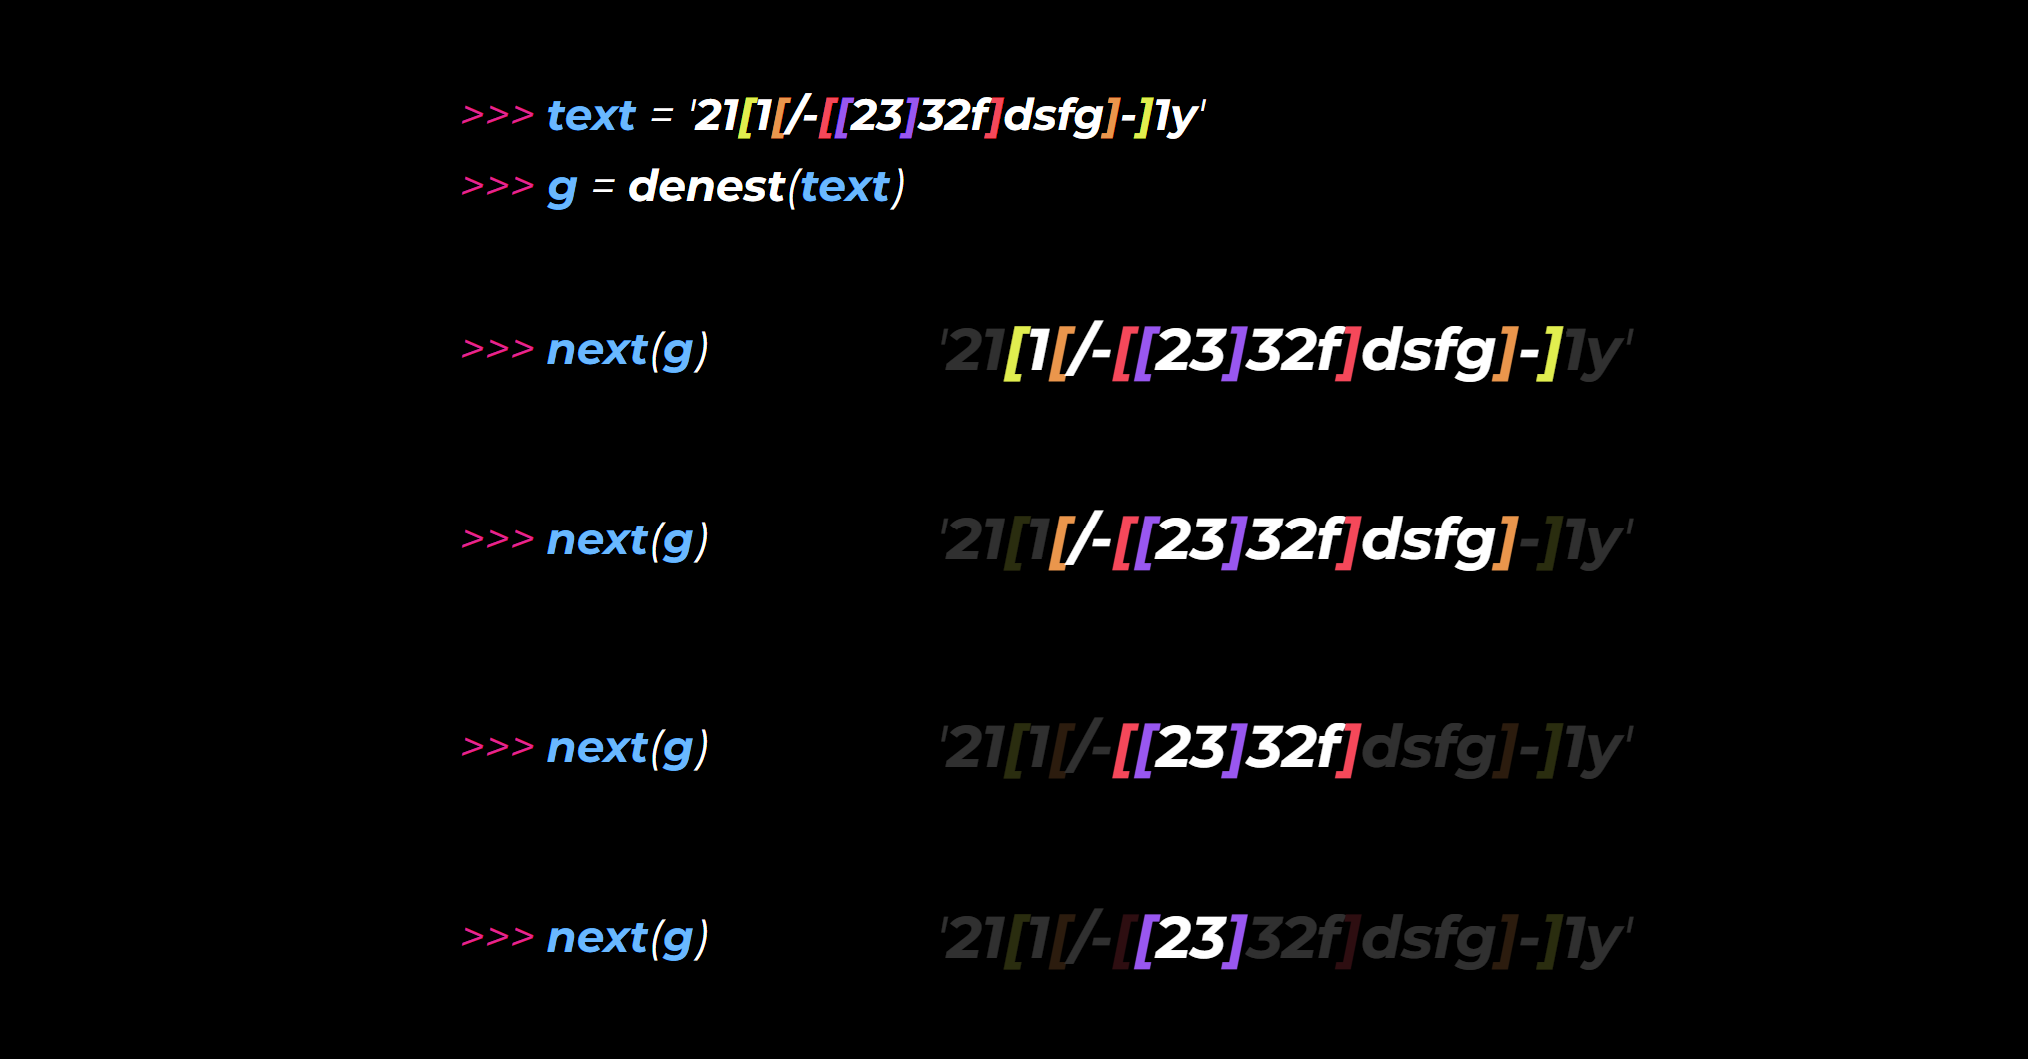

Q3 Tests:

In [9]:
text = '21[1[/-[[23]32f]dsfg]-]1y'
t = list(denest(text))
exp = ['[1[/-[[23]32f]dsfg]-]', '[/-[[23]32f]dsfg]', '[[23]32f]', '[23]']
assert t == exp, f'Expected {exp} but got {t}.'

text = '[[[[[[[]]]]]]]'
t = list(denest(text))
exp = ['[[[[[[[]]]]]]]', '[[[[[[]]]]]]', '[[[[[]]]]]', '[[[[]]]]', '[[[]]]', '[[]]', '[]']
assert t == exp, f'Expected {exp} but got {t}.'

## **Q4: ReDeNest**

In [10]:
def redenest(s):
  """
  Define DeNest recursively!

  >>> text = '21[1[/-[[23]32f]dsfg]-]1y'
  >>> g = redenest(text)
  >>> next(g)
  '[1[/-[[23]32f]dsfg]-]'
  >>> next(g)
  '[/-[[23]32f]dsfg]'
  """
  if len(s) < 2:          
    return
  if s[0] == '[' and s[len(s) - 1] == ']':
    yield s
    yield from redenest(s[1:-1])
  elif s[0] != '[':
    yield from redenest(s[1:])
  elif s[len(s) - 1] != ']':
    yield from redenest(s[:-1])

In [7]:
text = '21[1[/-[[23]32f]dsfg]-]1y'
t = list(redenest(text))
exp = ['[1[/-[[23]32f]dsfg]-]', '[/-[[23]32f]dsfg]', '[[23]32f]', '[23]']
assert t == exp, f'Expected {exp} but got {t}.'

text = '[[[[[[[]]]]]]]'
t = list(redenest(text))
exp = ['[[[[[[[]]]]]]]', '[[[[[[]]]]]]', '[[[[[]]]]]', '[[[[]]]]', '[[[]]]', '[[]]', '[]']
assert t == exp, f'Expected {exp} but got {t}.'